In [2]:
cd(s"C:\Users\User\Desktop\Mycop\temp")

# Простецкий ray tracer

https://habr.com/ru/post/436790/

In [ ]:
include("Ray_tracer.jl")

In [8]:
ivory      = RTr.Material( [0.4, 0.4, 0.3], [0.6,  0.3, 0.1, 0.0],    50., 1.0)
glass      = RTr.Material( [0.6, 0.7, 0.8], [0.0,  0.5, 0.1, 0.8],   125., 1.5)
mirror     = RTr.Material( [1.0, 1.0, 1.0], [0.0, 10.0, 0.8, 0.0],  1425., 1.0)
red_rubber = RTr.Material( [0.3, 0.1, 0.1], [0.9,  0.1, 0.0, 0.0],    10., 1.0)

spheres = [
RTr.Sphere([-3,    0,   -16], 2,      ivory)
RTr.Sphere([-1.0, -1.5, -12], 2,      glass)
RTr.Sphere([ 1.5, -0.5, -18], 3, red_rubber)
RTr.Sphere([ 7,    5,   -18], 4,     mirror)
]

lights = [
RTr.Light([-20, 20,  20], 1.5)
RTr.Light([ 30, 50, -25], 1.8)
RTr.Light([ 30, 20,  30], 1.7)
];

  1.860256 seconds (21.87 M allocations: 2.222 GiB, 17.78% gc time)


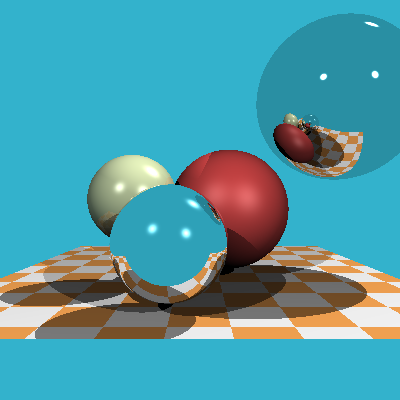

In [10]:
@time RTr.render(spheres, lights)

In [63]:
imgo = load("cod.png")
M = channelview(imgo)

r, g, b = 0.2, 0.7, 0.8
b = [r,g,b,1.];

In [62]:
for k in 1:5 # плавный переход за пять кадров
    
    A = [ M[l,i,j] + k*0.2*(b[l] - M[l,i,j]) for l in 1:4, i in 1:400, j in 1:400 ]
    
    save("img$k.png", colorview(RGBA, A) )
end

# Kaboom

https://habr.com/ru/post/437714/

In [ ]:
include("kaboom.jl") 

┌ Warning: Mapping to the storage type failed; perhaps your data had out-of-range values?
│ Try `map(clamp01nan, img)` to clamp values to a valid range.
└ @ ImageMagick C:\Users\User\.julia\packages\ImageMagick\Cq1Ef\src\ImageMagick.jl:180


 65.053182 seconds (1.32 G allocations: 51.930 GiB, 5.83% gc time)


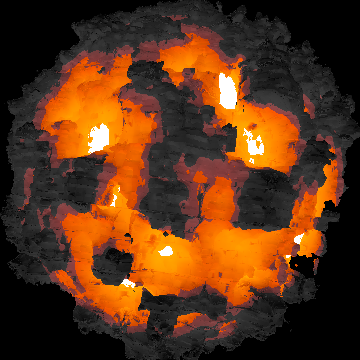

In [24]:
@time Bam.anim(iTime = 0.9)

# Мозайка

[Навеяно](https://habr.com/ru/post/454828/)

Датасеты:

+ [Коти](https://academictorrents.com/details/c501571c29d16d7f41d159d699d0e7fb37092cbd)
+ [Пёсы](http://vision.stanford.edu/aditya86/ImageNetDogs/)

In [1]:
using Images
using Statistics: mean
using LinearAlgebra: dot, normalize, norm, cross
import Base: *
*(a::Array{Float64,1}, b::Array{Float64,1}) = dot(a,b);

In [83]:
sz = 16

16

In [71]:
folderz = readdir("Images")

@time for foldr in folderz
    
    filez = readdir("Images/$foldr")
    
    for fl in filez
        
        imgi = load("Images/$foldr/$fl")
        if min( size(imgi)... ) < 256 continue end
            
        imgc = imgi[1:256, 1:256]
        imgr = imresize(imgc, sz, sz)
        save("dogz16/$fl", imgr)
    end
end

482.705390 seconds (7.28 M allocations: 38.379 GiB, 0.89% gc time)


In [277]:
pth = s"D:\inter3\Cat Annotation Dataset"
folderz = readdir(pth)

@time for foldr in folderz
    
    filez = readdir("$pth/$foldr")
    
    for fl in filez
        
        imgi = load("$pth/$foldr/$fl")
        if min( size(imgi)... ) < 256 continue end
        if typeof(tmp[1]) == Gray{Normed{UInt8,8}} continue end
        
        if min( size(imgi)... ) < 512
            imgc = imgi[1:256, 1:256]
        else
            imgc = imgi[1:512, 1:512]
        end
        imgr = imresize(imgc, sz, sz)
        save("ketz16/$fl", imgr)
    end
end

401.574743 seconds (3.37 M allocations: 36.317 GiB, 1.04% gc time)


In [278]:
filez = readdir("ketz16")
meanz = zeros(length(filez))

for (i,fl) in enumerate(filez)
    tmp = load("ketz16/$fl")
    meanz[i,:] .= mean( hue.( float.( HSV.(tmp) ) ) )
end

indcs = sortslices( [meanz filez], dims = 1 );

In [179]:
using DelimitedFiles
# indcs = readdlm("meanzandnamez.txt", ',', Float64)

In [279]:
open("meanzandnamezcat.txt", "w") do io
           writedlm(io, indcs)
       end

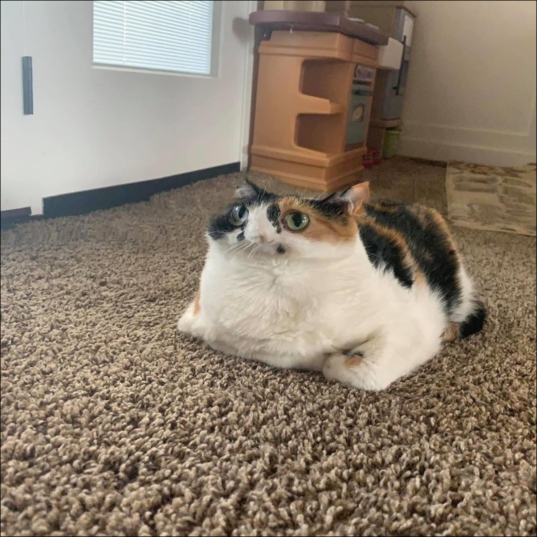

In [280]:
imgo = load("test3.jpg")
n, m = size(imgo)
n ÷= sz
m ÷= sz
imgo[1:sz*n, 1:sz*m]

In [281]:
Mx = [ imgo[(i-1)*sz:i*sz-1, (j-1)*sz:j*sz-1] for i in 2:n, j in 2:m ];

In [282]:
function simil(part, w)
    
    u = mean( hue.( float.( HSV.(part) ) ) )
    ii = searchsorted(indcs[:,1], u)
    ii.start+w >= size(indcs,1) ? (ww = size(indcs,1)-ii.start-1) : (ww = w)
    dists = []
    
    for i in ii.stop-w:ii.start+ww
        
        tmp = load("ketz16/$(indcs[i,2])")
        if typeof(tmp[1]) == Gray{Normed{UInt8,8}} continue end
        s = sum(x-> x^2, Float64.(channelview(part)) - Float64.(channelview(tmp)) )
        push!( dists,  s)
    end
    
    num = ii.stop-w + argmin(dists) - 1
    load("ketz16/$(indcs[num,2])")
end

simil (generic function with 2 methods)

In [283]:
size(Mx), size(Mx, 1)*size(Mx, 2)

((66, 66), 4356)

In [284]:
@time Mxx = [ simil(prt, 80) for prt in Mx ];

1212.088935 seconds (177.64 M allocations: 22.780 GiB, 0.26% gc time)


In [285]:
function combiner(arr)
    N, M = size(arr)
    n, m = size(arr[1])
    brr = zeros(RGBA{Normed{UInt8,8}}, N*n, M*m)

    for i in 1:N, j in 1:M
        x = 1+n*(i-1)
        y = 1+m*(j-1)
        brr[x:x+n-1,y:y+m-1] = arr[i,j]
    end
    brr
end

combiner (generic function with 1 method)

In [286]:
save( "testt3.jpg", combiner(Mxx) )